In [19]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
df = pl.read_csv('./thyroid_cancer_risk_data.csv')

In [21]:
df.head()

Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
i64,i64,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,str,str
1,66,"""Male""","""Russia""","""Caucasian""","""No""","""Yes""","""No""","""No""","""No""","""No""",9.37,1.67,6.16,1.08,"""Low""","""Benign"""
2,29,"""Male""","""Germany""","""Hispanic""","""No""","""Yes""","""No""","""No""","""No""","""No""",1.83,1.73,10.54,4.05,"""Low""","""Benign"""
3,86,"""Male""","""Nigeria""","""Caucasian""","""No""","""No""","""No""","""No""","""No""","""No""",6.26,2.59,10.57,4.61,"""Low""","""Benign"""
4,75,"""Female""","""India""","""Asian""","""No""","""No""","""No""","""No""","""No""","""No""",4.1,2.62,11.04,2.46,"""Medium""","""Benign"""
5,35,"""Female""","""Germany""","""African""","""Yes""","""Yes""","""No""","""No""","""No""","""No""",9.1,2.11,10.71,2.11,"""High""","""Benign"""


In [22]:
df.describe()

statistic,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
str,f64,f64,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,str,str
"""count""",212691.0,212691.0,"""212691""","""212691""","""212691""","""212691""","""212691""","""212691""","""212691""","""212691""","""212691""",212691.0,212691.0,212691.0,212691.0,"""212691""","""212691"""
"""null_count""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""","""0"""
"""mean""",106346.0,51.918497,null,null,null,null,null,null,null,null,null,5.045102,2.001727,8.246204,2.503403,null,null
"""std""",61398.74739,21.632815,null,null,null,null,null,null,null,null,null,2.860264,0.866248,2.164188,1.444631,null,null
"""min""",1.0,15.0,"""Female""","""Brazil""","""African""","""No""","""No""","""No""","""No""","""No""","""No""",0.1,0.5,4.5,0.0,"""High""","""Benign"""
"""25%""",53174.0,33.0,null,null,null,null,null,null,null,null,null,2.57,1.25,6.37,1.25,null,null
"""50%""",106346.0,52.0,null,null,null,null,null,null,null,null,null,5.04,2.0,8.24,2.51,null,null
"""75%""",159519.0,71.0,null,null,null,null,null,null,null,null,null,7.52,2.75,10.12,3.76,null,null
"""max""",212691.0,89.0,"""Male""","""USA""","""Middle Eastern""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""",10.0,3.5,12.0,5.0,"""Medium""","""Malignant"""


In [23]:
df = df.drop_nans()

In [24]:
df = df.drop_nulls()

In [25]:
df.describe()

statistic,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
str,f64,f64,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,str,str
"""count""",212691.0,212691.0,"""212691""","""212691""","""212691""","""212691""","""212691""","""212691""","""212691""","""212691""","""212691""",212691.0,212691.0,212691.0,212691.0,"""212691""","""212691"""
"""null_count""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""","""0"""
"""mean""",106346.0,51.918497,null,null,null,null,null,null,null,null,null,5.045102,2.001727,8.246204,2.503403,null,null
"""std""",61398.74739,21.632815,null,null,null,null,null,null,null,null,null,2.860264,0.866248,2.164188,1.444631,null,null
"""min""",1.0,15.0,"""Female""","""Brazil""","""African""","""No""","""No""","""No""","""No""","""No""","""No""",0.1,0.5,4.5,0.0,"""High""","""Benign"""
"""25%""",53174.0,33.0,null,null,null,null,null,null,null,null,null,2.57,1.25,6.37,1.25,null,null
"""50%""",106346.0,52.0,null,null,null,null,null,null,null,null,null,5.04,2.0,8.24,2.51,null,null
"""75%""",159519.0,71.0,null,null,null,null,null,null,null,null,null,7.52,2.75,10.12,3.76,null,null
"""max""",212691.0,89.0,"""Male""","""USA""","""Middle Eastern""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""",10.0,3.5,12.0,5.0,"""Medium""","""Malignant"""


In [30]:
df = df.drop('Patient_ID')

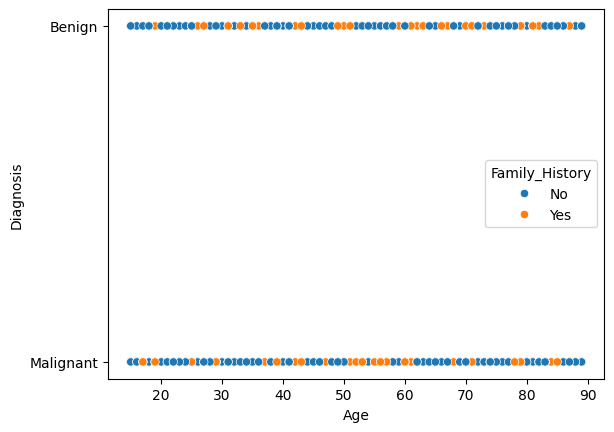

In [37]:
# Visualization entre l'age et le type de  cancer "begnin, malignant"

sns.scatterplot(data=df, x='Age', y='Diagnosis', hue='Family_History')
plt.show()